In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

df = pd.read_excel("../data/data.xlsx")
df = df.drop(columns=["Unnamed: 0"])

In [2]:
df.head()

,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tmsp        50410 non-null  datetime64[ns]
 1   country     50410 non-null  object        
 2   amount      50410 non-null  int64         
 3   success     50410 non-null  int64         
 4   PSP         50410 non-null  object        
 5   3D_secured  50410 non-null  int64         
 6   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.7+ MB


In [4]:
df.describe()

,tmsp,amount,success,3D_secured
count,50410,50410.000000,50410.000000,50410.000000
mean,2019-01-29 16:28:52.923269120,202.395715,0.202896,0.238266
min,2019-01-01 00:01:11,6.000000,0.000000,0.000000
25%,2019-01-14 12:00:36.249999872,133.000000,0.000000,0.000000
50%,2019-01-30 15:20:07.500000,201.000000,0.000000,0.000000
75%,2019-02-13 01:09:50.500000,269.000000,0.000000,0.000000
max,2019-02-28 23:48:19,630.000000,1.000000,1.000000
std,NaN,96.274730,0.402160,0.426027


In [5]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_file("../data/report.html")

ModuleNotFoundError: No module named 'ydata_profiling'

In [6]:
corr_matrix = df[["amount", "success", "3D_secured"]].corr()
corr_matrix

,amount,success,3D_secured
amount,1.000000,-0.086423,0.000178
success,-0.086423,1.000000,0.059284
3D_secured,0.000178,0.059284,1.000000


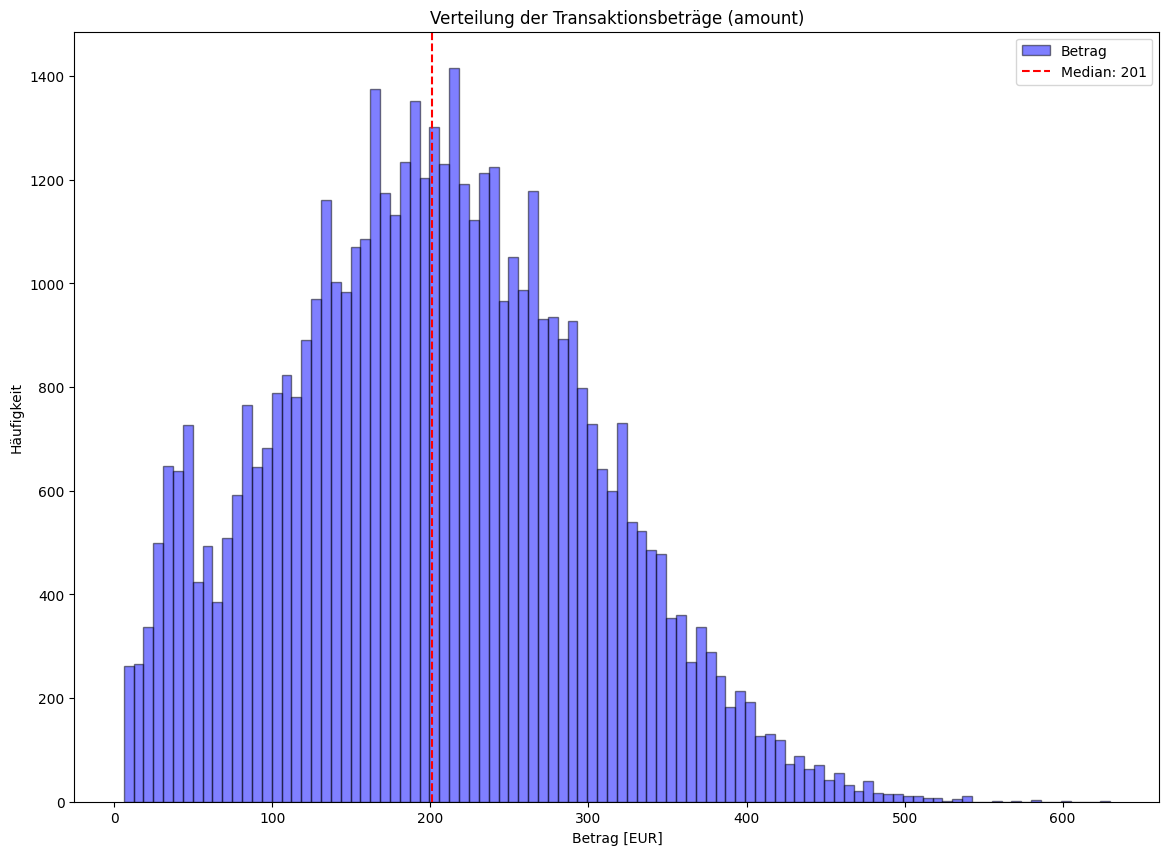

In [7]:
# Verteilung Amount
plt.figure(figsize=(14, 10))
plt.hist(
    df["amount"], bins=100, edgecolor="black", alpha=0.5, color="blue", label="Betrag"
)
plt.xlabel("Betrag [EUR]")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Transaktionsbeträge (amount)")
plt.axvline(
    df["amount"].median(),
    color="red",
    linestyle="--",
    label=f"Median: {df['amount'].median():.0f}",
)
plt.legend()
plt.savefig("../diagrams/amount_hist.png", dpi=300)
plt.show()

In [ ]:
# Verteilung Häufigkeit Kategorialer Merkmale


fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Verwende die Farben aus der config
colors_map = {
    "country": "steelblue",
    "PSP": "coral",
    "card": "lightgreen",
    "success": ["salmon", "steelblue"],
    "3D_secured": ["peachpuff", "lightblue"],
}

titles = {
    "country": "Land",
    "PSP": "Payment Service Provider",
    "card": "Kartentyp",
    "success": "Transaktionserfolg",
    "3D_secured": "3D-Secure Nutzung",
}

# Bar-Charts
for ax, col in zip(axes[0], ["country", "PSP", "card"]):
    counts = df[col].value_counts()
    bars = ax.bar(counts.index, counts.values, color=colors_map[col])
    ax.set_title(titles[col])
    ax.bar_label(bars, fmt="%d")
    ax.tick_params(axis="x", rotation=45)

# Pie-Charts
for ax, col, labels in zip(
    axes[1][:2],
    ["success", "3D_secured"],
    [["Fehlgeschlagen", "Erfolgreich"], ["Ohne 3D-Secure", "Mit 3D-Secure"]],
):
    df[col].value_counts().sort_index(ascending=False).plot.pie(
        ax=ax, labels=labels, colors=colors_map[col], autopct="%1.1f%%", startangle=90
    )
    ax.set_title(titles[col])

fig.delaxes(axes[1, 2])
plt.suptitle("Häufigkeitsverteilung kategorialer Merkmale")
plt.tight_layout()
plt.savefig("../diagrams/categorials.png", dpi=300)
plt.show()

In [ ]:
# Verteilung Erfolgsrate kategorialer Merkmale

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

configs = [
    ("country", "Land", "steelblue"),
    ("PSP", "Payment Service Provider", "coral"),
    ("card", "Kartentyp", "lightgreen"),
    ("3D_secured", "3D-Secure Status", "lightblue"),
]

for ax, (col, title, color) in zip(axes.flat, configs):
    rates = df.groupby(col)["success"].mean().sort_values(ascending=False)
    bars = ax.bar(rates.index, rates.values, color=color)

    ax.set_title(f"Erfolgsrate nach {title}")
    ax.set_ylabel("Erfolgsrate")
    ax.axhline(
        y=df["success"].mean(),
        color="red",
        linestyle="--",
        alpha=0.5,
        label=f"Gesamt-Ø: {df['success'].mean():.1%}",
    )

    if col == "3D_secured":
        ax.set_xticks([1, 0])
        ax.set_xticklabels(["Mit 3D-Secure", "Ohne 3D-Secure"])

    ax.bar_label(bars, fmt=lambda x: f"{x:.1%}")

plt.suptitle("Analyse der Erfolgsraten nach kategorialen Merkmalen")
plt.legend()
plt.tight_layout()
plt.savefig(fname="../diagrams/success_rates_annotated.png", dpi=300)
plt.show()

In [ ]:
# Zeitliche Features extrahieren
df["hour"] = df["tmsp"].dt.hour
df["day"] = df["tmsp"].dt.day
df["weekday"] = df["tmsp"].dt.dayofweek
df["week"] = df["tmsp"].dt.isocalendar().week
df["month"] = df["tmsp"].dt.month

In [ ]:
# Zeitreihenanalyse Erfolgrate

fig = plt.figure(figsize=(14, 10))
gs = GridSpec(2, 2, figure=fig)

axes = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]), fig.add_subplot(gs[1, :])]

configs = [
    ("hour", "Stundenverteilung", "steelblue"),
    ("weekday", "Wochentagsverteilung", "coral"),
    (df["tmsp"].dt.date, "Zeitlicher Verlauf", "green"),
]

for ax, (group, title, color) in zip(axes, configs):
    stats = df.groupby(group)["success"].agg(["count", "mean"])

    # Plots
    ax.bar(range(len(stats)), stats["count"], alpha=0.7, color=color)
    ax2 = ax.twinx()
    ax2.plot(range(len(stats)), stats["mean"], "ro-", linewidth=2.5)

    ax.set_title(title, fontweight="bold")
    ax.set_ylabel("Anzahl", color=color)
    ax2.set_ylabel("Erfolgsrate", color="red")
    ax2.set_ylim(0, 1)

    # X-Achsen-Labels
    if "Wochentag" in title:
        ax.set_xticks(range(7))
        ax.set_xticklabels(["Mo", "Di", "Mi", "Do", "Fr", "Sa", "So"])
    elif "Zeitlicher" in title:
        # Format: MM-dd Wochentag
        ax.plot(range(len(stats)), stats["count"].rolling(3).mean())
        labels = [
            f"{pd.to_datetime(d).strftime('%m-%d')} "
            f"{['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'][pd.to_datetime(d).weekday()]}"
            for d in stats.index
        ]

        # Zeige Labels alle 7 Tage
        tick_positions = range(0, len(stats), 7)  # Alle 7 Tage
        tick_labels = [labels[i] for i in tick_positions if i < len(labels)]

        ax.set_xticks(tick_positions)
        ax.set_xticklabels(tick_labels, rotation=45, ha="right")

plt.suptitle("Zeitliche Analyse der Transaktionen", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig(fname="../diagrams/zeitreihenanalyse.png", dpi=300)
plt.show()

In [ ]:
# Zeitreihenanalyse amount

fig = plt.figure(figsize=(16, 12))
gs = GridSpec(3, 2, figure=fig, hspace=0.3)

# Kategoriale Features definieren
cat_features = ["country", "PSP", "card", "3D_secured"]

# 1. HEATMAPS: Stündliche Verteilung pro Feature
for idx, feature in enumerate(cat_features[:2]):
    ax = fig.add_subplot(gs[0, idx])

    # Pivot-Tabelle erstellen
    pivot = df.groupby(["hour", feature])["success"].count().unstack(fill_value=0)
    pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

    # Heatmap
    sns.heatmap(
        pivot_pct.T,
        cmap="YlOrRd",
        annot=True,
        fmt=".0f",
        ax=ax,
        cbar_kws={"label": "Anteil (%)"},
    )
    ax.set_title(f"{feature} Verteilung nach Tageszeit")
    ax.set_xlabel("Stunde")
    ax.set_ylabel(feature)

# 2. WOCHENTAGSANALYSE: Erfolgsraten pro Kategorie
for idx, feature in enumerate(cat_features[2:4]):
    ax = fig.add_subplot(gs[1, idx])

    # Erfolgsrate pro Wochentag und Kategorie
    weekday_success = df.groupby(["weekday", feature])["success"].mean().unstack()

    # Gruppierter Balkenplot
    weekday_success.plot(kind="bar", ax=ax, width=0.8)
    ax.set_title(f"Erfolgsraten nach Wochentag: {feature}")
    ax.set_xticklabels(["Mo", "Di", "Mi", "Do", "Fr", "Sa", "So"], rotation=0)
    ax.set_ylabel("Erfolgsrate")
    ax.legend(title=feature, loc="best")
    ax.set_ylim(0, 1)

# 3. ZEITVERLAUF: Tägliche Anteile der Kategorien
ax_bottom = fig.add_subplot(gs[2, :])

# Wähle ein Feature für den Zeitverlauf (z.B. PSP)
daily_dist = df.groupby([df["tmsp"].dt.date, "PSP"]).size().unstack(fill_value=0)
daily_dist_pct = daily_dist.div(daily_dist.sum(axis=1), axis=0) * 100

# Gestapeltes Flächendiagramm
daily_dist_pct.plot(
    kind="area", stacked=True, ax=ax_bottom, alpha=0.7, colormap="tab10"
)
ax_bottom.set_title("Tägliche Verteilung der Payment Service Provider")
ax_bottom.set_xlabel("Datum")
ax_bottom.set_ylabel("Anteil (%)")
ax_bottom.legend(title="PSP", bbox_to_anchor=(1.05, 1), loc="upper left")
ax_bottom.set_ylim(0, 100)

plt.suptitle("Zeitliche Analyse kategorialer Features", fontsize=16, fontweight="bold")
plt.savefig(
    "../diagrams/categorical_temporal_analysis.png", dpi=300, bbox_inches="tight"
)
plt.show()

In [13]:
df

,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners
...,...,...,...,...,...,...,...
50405,2019-02-28 23:45:39,Switzerland,415,0,UK_Card,0,Visa
50406,2019-02-28 23:46:48,Austria,91,0,UK_Card,0,Master
50407,2019-02-28 23:47:04,Austria,91,0,UK_Card,0,Master
50408,2019-02-28 23:47:36,Austria,91,0,UK_Card,0,Master


C:\Users\Erik\AppData\Local\Temp\ipykernel_19756\3055891151.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_rate_by_amount = df.groupby('amount_bin')['success'].mean()


[]

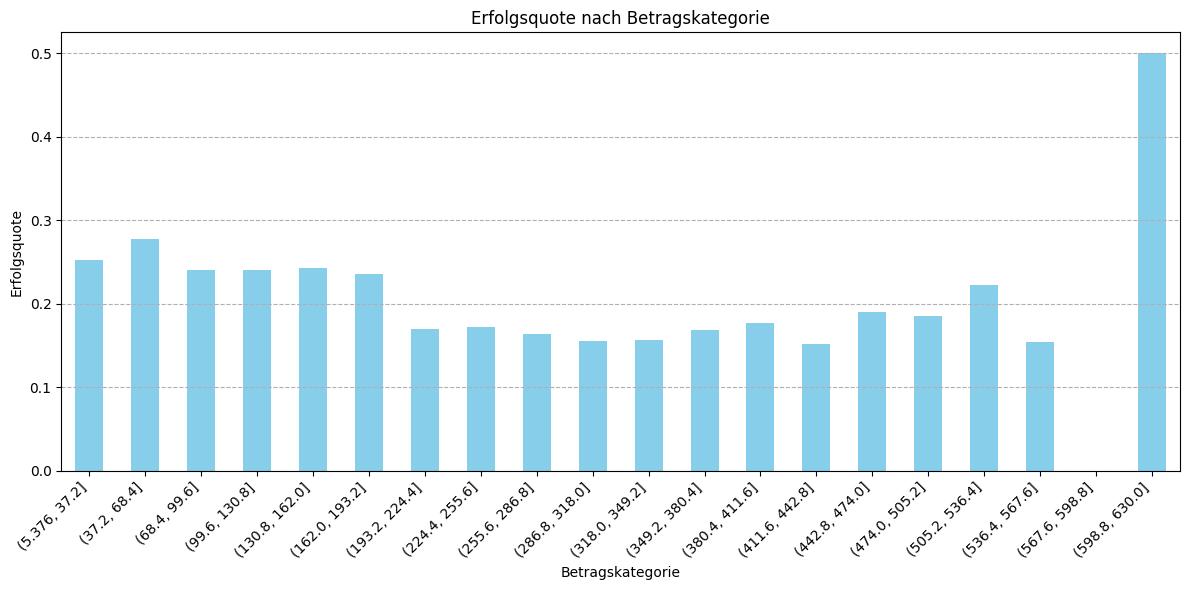

In [46]:
df["amount_bin"] = pd.cut(df["amount"], bins=20)
success_rate_by_amount = df.groupby("amount_bin")["success"].mean()

plt.figure(figsize=(12, 6))
success_rate_by_amount.plot(kind="bar", color="skyblue")

plt.title("Erfolgsquote nach Betragskategorie")
plt.xlabel("Betragskategorie")
plt.ylabel("Erfolgsquote")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--")
plt.tight_layout()
plt.plot()

In [32]:
df[df["amount"] < 200]["success"].mean()

np.float64(0.24446764930318488)

In [33]:
df[df["amount"] > 200]["success"].mean()

np.float64(0.16267942583732056)

In [43]:
df["amount_bin"].value_counts(sort=False)

amount_bin
(5.376, 37.2]     2011
(37.2, 68.4]      2666
(68.4, 99.6]      3194
(99.6, 130.8]     4253
(130.8, 162.0]    5505
(162.0, 193.2]    6066
(193.2, 224.4]    6341
(224.4, 255.6]    5580
(255.6, 286.8]    4927
(286.8, 318.0]    3811
(318.0, 349.2]    2641
(349.2, 380.4]    1612
(380.4, 411.6]     957
(411.6, 442.8]     473
(442.8, 474.0]     226
(474.0, 505.2]      92
(505.2, 536.4]      36
(536.4, 567.6]      13
(567.6, 598.8]       4
(598.8, 630.0]       2
Name: count, dtype: int64

C:\Users\Erik\AppData\Local\Temp\ipykernel_19756\2036388748.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('amount_bin')['success'].mean().plot(kind='bar', color='darkorange', ax=ax1, label='Erfolgsquote')


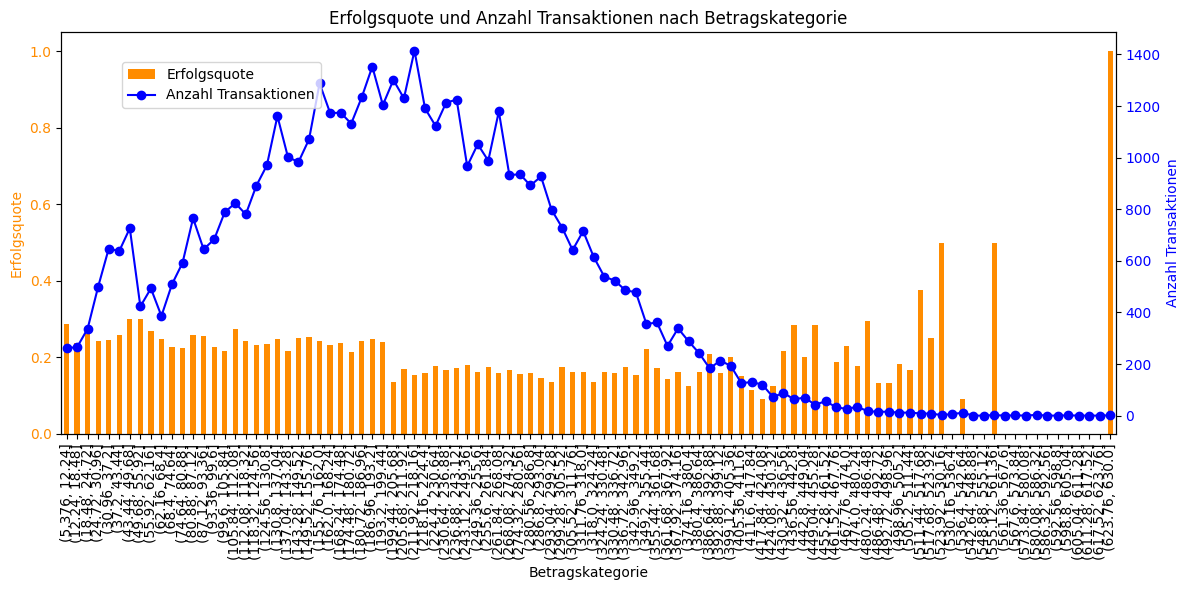

In [62]:
df["amount_bin"] = pd.cut(df["amount"], bins=100)

# Erstellen des Plots und der zweiten Achse
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plotten der Daten
df.groupby("amount_bin")["success"].mean().plot(
    kind="bar", color="darkorange", ax=ax1, label="Erfolgsquote"
)
df["amount_bin"].value_counts(sort=False).plot(
    kind="line", color="blue", marker="o", ax=ax2, label="Anzahl Transaktionen"
)

# Formatierung
ax1.set_xlabel("Betragskategorie")
ax1.set_ylabel("Erfolgsquote", color="darkorange")
ax2.set_ylabel("Anzahl Transaktionen", color="blue")
ax1.tick_params(axis="y", labelcolor="darkorange")
ax2.tick_params(axis="y", labelcolor="blue")
plt.title("Erfolgsquote und Anzahl Transaktionen nach Betragskategorie")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
fig.tight_layout()
plt.xticks(rotation=45, ha="right")

# Speichern der Datei
plt.savefig("success_rate_over_amount_bins.png")